In [1]:
!pip install vaderSentiment

In [4]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vs=SentimentIntensityAnalyzer()
text='I love reading this book'
vs.polarity_scores(text)

{'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.6369}

In [5]:
#webscrapping
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import os


In [16]:
a=input('Please enter your url 1:')

seed_urls = [a]

def build_dataset(seed_urls):
    news_data = []
    for url in seed_urls:
        news_category = url.split('/')[-1]
        data = requests.get(url)
        soup = BeautifulSoup(data.content, 'html.parser')
       
        news_articles = [{'news_headline': headline.find('span',
                                                         attrs={"itemprop": "headline"}).string,
                          'news_article': article.find('div',
                                                       attrs={"itemprop": "articleBody"}).string,
                          'news_category': news_category}
                         
                            for headline, article in
                             zip(soup.find_all('div',
                                               class_=["news-card-title news-right-box"]),
                                 soup.find_all('div',
                                               class_=["news-card-content news-right-box"]))
                        ]
        news_data.extend(news_articles)
       
    df =  pd.DataFrame(news_data)
    df = df[['news_headline', 'news_article', 'news_category']]
    return df

Please enter your url 1:https://www.inshorts.com/en/read/world


In [17]:
df=build_dataset(seed_urls)
df.head()

,news_headline,news_article,news_category
0,Not sure if Afghan Hindus & Sikhs will have an...,"Afghan MP Anarkali Kaur, who was evacuated fro...",world
1,US body says 260 Afghan Sikhs stranded in Kabu...,Over 260 Afghan Sikhs including women and more...,world
2,600 Afghans stuffed in US plane but army dogs ...,Chinese media has mocked US evacuation efforts...,world
3,There was a plot to kill Ashraf Ghani to creat...,On being asked why former Afghan President Ash...,world
4,Taliban says it recaptured 3 Afghan districts ...,The Taliban has said that its militants have r...,world


In [18]:
df.to_csv('news.csv',index=False)

In [19]:
#removingstopwords
import nltk
nltk.download('stopwords')
stopword_list=nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')
len(stopword_list)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Office\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


177

In [9]:
#Removing html tags
def html_tag(text):
    soup = BeautifulSoup(text,"html.parser")
    new_text=soup.get_text()
    return new_text
html_tag('<html><h2>Some important information</h2></html>')

'Some important information'

In [10]:
#Contractions(y'all=you all)
!pip install contractions
import contractions
def con(text):
    expand=contractions.fix(text)
    return expand
con("Y'all can't expand I'd think")

'you all cannot expand I would think'

In [11]:
#removing special characters
import re
def remove_sp(text):
    pattern = r'[^A-Za-z0-9\s]'
    text = re.sub(pattern,' ',text)
    return text
remove_sp('well this has been fun!!! What do you think is good? I am super excited that I am making progress>>123@@@')

'well this has been fun    What do you think is good  I am super excited that I am making progress  123   '

In [12]:
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer =ToktokTokenizer()

In [13]:
#Removing stopwords
def remove_stopwords(text):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    filtered_text =' '.join(filtered_tokens)
    return filtered_text

In [14]:
remove_stopwords("The, and , if all stopwords and even not, I am not going to show up")

'The , , stopwords even not , I not going show'

In [20]:
# 1.Lower case
# 2. HTML Tags
# 3. Contractions
# 4. Special Characters
# 5. Stop words

#for lower case
df.news_headline = df.news_headline.apply(lambda x: x.lower())
df.news_article = df.news_article.apply(lambda x: x.lower())

#for html tags
df.news_headline = df.news_headline.apply(html_tag)
df.news_article = df.news_article.apply(html_tag)

#for contractions
df.news_headline = df.news_headline.apply(con)
df.news_article = df.news_article.apply(con)

df.news_headline = df.news_headline.apply(remove_sp)
df.news_article = df.news_article.apply(remove_sp)

df.news_headline = df.news_headline.apply(remove_stopwords)
df.news_article = df.news_article.apply(remove_stopwords)

df.head()

,news_headline,news_article,news_category
0,not sure afghan hindus sikhs rights taliban af...,afghan mp anarkali kaur evacuated kabul india ...,world
1,us body says 260 afghan sikhs stranded kabul s...,260 afghan sikhs including women 50 children t...,world
2,600 afghans stuffed us plane army dogs got res...,chinese media mocked us evacuation efforts afg...,world
3,plot kill ashraf ghani create chaos ex afghan ...,asked former afghan president ashraf ghani fle...,world
4,taliban says recaptured 3 afghan districts tak...,taliban said militants recaptured three distri...,world


In [21]:
df['compound'] = df['news_article'].apply(lambda x: vs.polarity_scores(x)['compound'])

In [22]:
df.head()

,news_headline,news_article,news_category,compound
0,not sure afghan hindus sikhs rights taliban af...,afghan mp anarkali kaur evacuated kabul india ...,world,-0.4614
1,us body says 260 afghan sikhs stranded kabul s...,260 afghan sikhs including women 50 children t...,world,0.8779
2,600 afghans stuffed us plane army dogs got res...,chinese media mocked us evacuation efforts afg...,world,-0.6917
3,plot kill ashraf ghani create chaos ex afghan ...,asked former afghan president ashraf ghani fle...,world,0.5574
4,taliban says recaptured 3 afghan districts tak...,taliban said militants recaptured three distri...,world,0.0000


In [48]:
df.tail()

,news_headline,news_article,news_category,compound
70,root technical adjustment made less vulnerable...,ex england batsman michael atherton said sligh...,sports,-0.1548
71,messi departure painful past barcelona head coach,ahead barcelona first la liga match 2021 22 se...,sports,-0.5951
72,siraj looked like picking wicket every ball ga...,former india captain sunil gavaskar praised in...,sports,0.6834
73,kohli not happy deep dasgupta india captain di...,former india cricketer deep dasgupta said team...,sports,-0.1774
74,dravid wanted could easily taken india back co...,slc secretary mohan de silva praised rahul dra...,sports,0.9022


In [61]:
df.iloc[0]




news_headline    taliban enter afghan capital kabul say not pla...
news_article     taliban begun entering kabul sides afghan inte...
news_category                                                world
compound                                                   -0.1779
Name: 0, dtype: object

In [19]:
import seaborn as sns

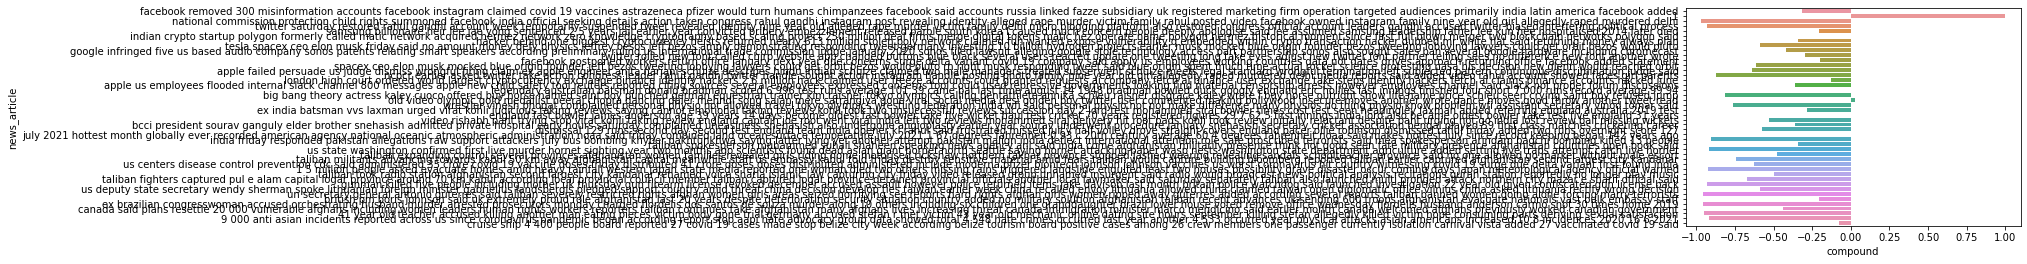

In [20]:
 ax= sns.barplot(x=df['compound'], y=df['news_article'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


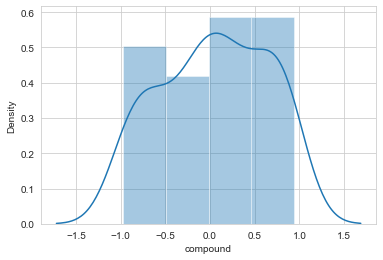

In [63]:
#distrubution plot of compound score
sns.distplot(df['compound']);

<AxesSubplot:xlabel='compound', ylabel='count'>

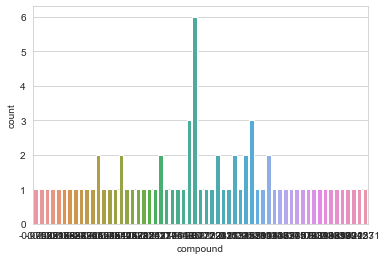

In [65]:
sns.countplot(x='compound',data=df)

<AxesSubplot:xlabel='compound', ylabel='news_category'>

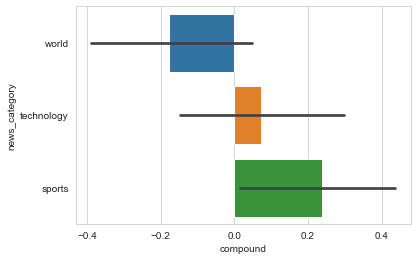

In [69]:
sns.barplot(x='compound',y='news_category',data=df)